In [1]:
import numpy as np
import matplotlib.pyplot as plt
##from sklearn.metrics import recall_score

#MLP BY RANDRIA INDUSTRIES

In [6]:
class RandriaMlp :
     
     def cost_function(A, y):
        eps=10**(-4)
        L = 1 / 4 * np.sum(-y * np.log(A+eps) + (1 - y) * np.log(1 - A+eps))
        return L
     def initial(dimension):
         C=len(dimension)
         parameters={}
         for i in range (1,C):
             parameters['W'+str(i)]=np.random.randn(dimension[i],dimension[i-1])
             parameters['b'+str(i)]=np.random.randn(dimension[i],1)
         return parameters
     def fowardpropagation(X, parameters):
         C=len(parameters) // 2
         activation={'A0' : X}
         for i in range (1,C+1):
             Z=parameters['W'+str(i)].dot(activation['A'+str(i-1)])+parameters['b'+str(i)]
             activation['A'+str(i)]=1/(1+np.exp(-Z))
         return activation
     def backpropagation(X, y, activation, parameters):
         m=y.shape[1]
         c=len(parameters)//2
         dZ=activation['A'+str(c)]-y
         gradients={}
         for i in reversed(range(1,c+1)):
             gradients['dW'+str(i)]=1/m*np.dot(dZ,activation['A'+str(i-1)].T)
             gradients['db'+str(i)]=1/m*np.sum(dZ,axis=1,keepdims=True)
             if i > 1 :
                 dZ=np.dot(parameters['W'+str(i)].T,dZ)*activation['A'+str(i-1)]*(1-activation['A'+str(i-1)])
         return gradients

     def update(gradients, parameters,lr):
         C=len(parameters)//2
         for c in range(1,C+1):
             parameters['W'+str(c)]=parameters['W'+str(c)]-lr*gradients['dW'+str(c)]
             parameters['b'+str(c)]=parameters['b'+str(c)]-lr*gradients['db'+str(c)]
         return parameters


     def predict(X,parameters):
         c=len(parameters)//2
         activation=RandriaMlp.fowardpropagation(X,parameters)
         Afinal=activation['A'+str(c)]
         return Afinal >= 0.5


     def artificial_neuron(X, y,listrnn, lr=0.1, n=1000):
         np.random.seed(0)
         ##initialisena
         dimensions=list(listrnn)
         dimensions.insert(0,X.shape[0])
         dimensions.append(y.shape[0])
         parameters=RandriaMlp.initial(dimensions)
         C=len(parameters) // 2
         train_loss = []
         ##accuracy = []
         for i in range(n):
             activation = RandriaMlp.fowardpropagation(X, parameters)
             gradients =RandriaMlp.backpropagation(X, y,activation,parameters)
             parameters = RandriaMlp.update(gradients, parameters, lr)
             if i % 10 == 0:
                 train_loss.append(RandriaMlp.cost_function(y, activation['A'+str(C)]))
                 y_pred=RandriaMlp.predict(X,parameters)
                ## accuracy.append(recall_score(y_pred.flatten(),y.flatten())*100)
         print("Learning accomplished!!")
         print("\n\n")
         print("PREDICTION AFTER LEARNING:")
         print(y_pred)
         print(" with :\n  False = 0 \n True =1")
         print("\n ")
         plt.figure(figsize=(14,4))
         plt.subplot(1,2,1)
         plt.plot(train_loss,label='Train loss',c='red')
        ## plt.subplot(1,2,1)
        ## plt.plot(accuracy,label='Accuracy',c='green')
        ## plt.legend()
         plt.show()
         return parameters

# Test

Learning accomplished!!



PREDICTION AFTER LEARNING:
[[False  True  True  True]]
 with :
  False = 0 
 True =1

 


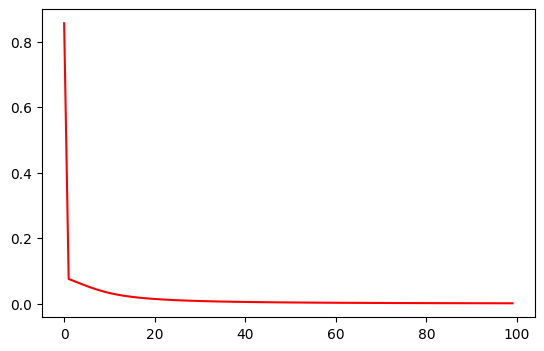

{'W1': array([[ 1.72909162,  0.44496053],
        [ 2.78770314,  3.2000212 ],
        [ 1.78345036, -0.83404453],
        [ 0.84885387, -0.349566  ]]),
 'b1': array([[-0.33984979],
        [-1.43992941],
        [-0.35429153],
        [ 1.41962975]]),
 'W2': array([[ 7.50790227e-01,  8.59305956e-02,  4.50531995e-01,
          3.56444564e-01],
        [ 1.46089279e+00, -2.49714824e-01,  2.91674268e-01,
         -8.67646678e-01],
        [-2.54828379e+00,  6.78483764e-01,  8.55239479e-01,
         -7.66290045e-01],
        [ 2.36210891e+00, -1.28218337e+00,  7.49325786e-02,
         -1.87163985e-01],
        [ 1.59201739e+00,  1.65466017e+00,  1.45904702e-01,
          2.98209331e-01],
        [-8.74060565e-01, -2.00286894e+00, -3.25510552e-01,
          2.04378356e-01],
        [ 1.44971419e+00,  1.68509041e+00, -3.33171633e-01,
         -4.32773940e-01],
        [-6.54309394e-01, -9.52776088e-01, -1.40890527e+00,
          2.23785685e+00],
        [-3.40388926e-01, -1.94046186e-01, -1.

In [7]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
X=X.T
y=np.array([[0,1,1,1]])
RandriaMlp.artificial_neuron(X,y,listrnn=(4,80))